### Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [2]:
df=pd.read_csv("drugsCom_raw.tsv",sep='\t')
df

Unnamed: 0                  drugName                     condition  \
0           206461                 Valsartan  Left Ventricular Dysfunction   
1            95260                Guanfacine                          ADHD   
2            92703                    Lybrel                 Birth Control   
3           138000                Ortho Evra                 Birth Control   
4            35696  Buprenorphine / naloxone             Opiate Dependence   
...            ...                       ...                           ...   
161292      191035                   Campral            Alcohol Dependence   
161293      127085            Metoclopramide               Nausea/Vomiting   
161294      187382                   Orencia          Rheumatoid Arthritis   
161295       47128        Thyroid desiccated           Underactive Thyroid   
161296      215220              Lubiprostone         Constipation, Chronic   

                                                   review  rating  \
0       "It has no side effect, I take it in combinati...     9.0   
1       "My son is halfway through his fourth week of ...     8.0   
2       "I used to take another oral contraceptive, wh...     5.0   
3       "This is my first time using any form of birth...     8.0   
4       "Suboxone has completely turned my life around...     9.0   
...                                                   ...     ...   
161292  "I wrote my first report in Mid-October of 201...    10.0   
161293  "I was given this in IV before surgey. I immed...     1.0   
161294  "Limited improvement after 4 months, developed...     2.0   
161295  "I&#039;ve been on thyroid medication 49 years...    10.0   
161296  "I&#039;ve had chronic constipation all my adu...     9.0   

                      date  usefulCount  
0             May 20, 2012           27  
1           April 27, 2010          192  
2        December 14, 2009           17  
3         November 3, 2015           10  
4        November 27, 2016           37  
...                    ...          ...  
161292        May 31, 2015          125  
161293    November 1, 2011           34  
161294      March 15, 2014           35  
161295  September 19, 2015           79  
161296   December 13, 2014          116  

[161297 rows x 7 columns]

# EDA (Exploratory Data Analysis)

### 1) Data Collection

In [3]:
df.head()

Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           10  
4  November 27, 2016           37

In [4]:
df.tail()

Unnamed: 0            drugName              condition  \
161292      191035             Campral     Alcohol Dependence   
161293      127085      Metoclopramide        Nausea/Vomiting   
161294      187382             Orencia   Rheumatoid Arthritis   
161295       47128  Thyroid desiccated    Underactive Thyroid   
161296      215220        Lubiprostone  Constipation, Chronic   

                                                   review  rating  \
161292  "I wrote my first report in Mid-October of 201...    10.0   
161293  "I was given this in IV before surgey. I immed...     1.0   
161294  "Limited improvement after 4 months, developed...     2.0   
161295  "I&#039;ve been on thyroid medication 49 years...    10.0   
161296  "I&#039;ve had chronic constipation all my adu...     9.0   

                      date  usefulCount  
161292        May 31, 2015          125  
161293    November 1, 2011           34  
161294      March 15, 2014           35  
161295  September 19, 2015           79  
161296   December 13, 2014          116

In [5]:
df.shape

(161297, 7)

### 2) Finding all variables & understanding them

In [6]:
df.value_counts

<bound method DataFrame.value_counts of         Unnamed: 0                  drugName                     condition  \
0           206461                 Valsartan  Left Ventricular Dysfunction   
1            95260                Guanfacine                          ADHD   
2            92703                    Lybrel                 Birth Control   
3           138000                Ortho Evra                 Birth Control   
4            35696  Buprenorphine / naloxone             Opiate Dependence   
...            ...                       ...                           ...   
161292      191035                   Campral            Alcohol Dependence   
161293      127085            Metoclopramide               Nausea/Vomiting   
161294      187382                   Orencia          Rheumatoid Arthritis   
161295       47128        Thyroid desiccated           Underactive Thyroid   
161296      215220              Lubiprostone         Constipation, Chronic   

                       

In [7]:
df.dtypes

Unnamed: 0       int64
drugName        object
condition       object
review          object
rating         float64
date            object
usefulCount      int64
dtype: object

### 3) Cleaning the dataset

In [8]:
# Finding duplicate values
df.duplicated().sum()

0

In [9]:
# Finding missing values
print("There are {} missing values in the data.".format(df.isna().sum().sum())) 

There are 899 missing values in the data.


In [10]:
df.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

### ==>From the above result, we have 899 null values(NaN) in 'condition' column

In [11]:
# Dropping null values
df1=df.dropna()
df1

Unnamed: 0                  drugName                     condition  \
0           206461                 Valsartan  Left Ventricular Dysfunction   
1            95260                Guanfacine                          ADHD   
2            92703                    Lybrel                 Birth Control   
3           138000                Ortho Evra                 Birth Control   
4            35696  Buprenorphine / naloxone             Opiate Dependence   
...            ...                       ...                           ...   
161292      191035                   Campral            Alcohol Dependence   
161293      127085            Metoclopramide               Nausea/Vomiting   
161294      187382                   Orencia          Rheumatoid Arthritis   
161295       47128        Thyroid desiccated           Underactive Thyroid   
161296      215220              Lubiprostone         Constipation, Chronic   

                                                   review  rating  \
0       "It has no side effect, I take it in combinati...     9.0   
1       "My son is halfway through his fourth week of ...     8.0   
2       "I used to take another oral contraceptive, wh...     5.0   
3       "This is my first time using any form of birth...     8.0   
4       "Suboxone has completely turned my life around...     9.0   
...                                                   ...     ...   
161292  "I wrote my first report in Mid-October of 201...    10.0   
161293  "I was given this in IV before surgey. I immed...     1.0   
161294  "Limited improvement after 4 months, developed...     2.0   
161295  "I&#039;ve been on thyroid medication 49 years...    10.0   
161296  "I&#039;ve had chronic constipation all my adu...     9.0   

                      date  usefulCount  
0             May 20, 2012           27  
1           April 27, 2010          192  
2        December 14, 2009           17  
3         November 3, 2015           10  
4        November 27, 2016           37  
...                    ...          ...  
161292        May 31, 2015          125  
161293    November 1, 2011           34  
161294      March 15, 2014           35  
161295  September 19, 2015           79  
161296   December 13, 2014          116  

[160398 rows x 7 columns]

In [12]:
df1.isnull().sum()

Unnamed: 0     0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

### ==>From the above set, we can remove 'Unanamed' & 'Date' columns as they are not necessary

In [13]:
# Dropping 2 columns
df2=df1.drop(['Unnamed: 0','date'],axis=1)
df2

drugName                     condition  \
0                      Valsartan  Left Ventricular Dysfunction   
1                     Guanfacine                          ADHD   
2                         Lybrel                 Birth Control   
3                     Ortho Evra                 Birth Control   
4       Buprenorphine / naloxone             Opiate Dependence   
...                          ...                           ...   
161292                   Campral            Alcohol Dependence   
161293            Metoclopramide               Nausea/Vomiting   
161294                   Orencia          Rheumatoid Arthritis   
161295        Thyroid desiccated           Underactive Thyroid   
161296              Lubiprostone         Constipation, Chronic   

                                                   review  rating  usefulCount  
0       "It has no side effect, I take it in combinati...     9.0           27  
1       "My son is halfway through his fourth week of ...     8.0          192  
2       "I used to take another oral contraceptive, wh...     5.0           17  
3       "This is my first time using any form of birth...     8.0           10  
4       "Suboxone has completely turned my life around...     9.0           37  
...                                                   ...     ...          ...  
161292  "I wrote my first report in Mid-October of 201...    10.0          125  
161293  "I was given this in IV before surgey. I immed...     1.0           34  
161294  "Limited improvement after 4 months, developed...     2.0           35  
161295  "I&#039;ve been on thyroid medication 49 years...    10.0           79  
161296  "I&#039;ve had chronic constipation all my adu...     9.0          116  

[160398 rows x 5 columns]

### 4) Converting Numerical dtypes to same dtypes

In [14]:
df2.dtypes

drugName        object
condition       object
review          object
rating         float64
usefulCount      int64
dtype: object

### ==>From the above we can see that, rating & usefulcount are numerical but different dtypes

In [15]:
# Converting to same dtypes
df2['rating']=df2['rating'].astype(int)

In [16]:
df2.dtypes

drugName       object
condition      object
review         object
rating          int32
usefulCount     int64
dtype: object

### 5) Goal Conditions : ['Depression', 'High Blood Pressure', 'Diabetes, Type 2']

In [17]:
# Before: value count of 'condition'
df2['condition'].nunique()

884

In [18]:
# Before: names of 'condition'
df2['condition'].unique()

array(['Left Ventricular Dysfunction', 'ADHD', 'Birth Control',
       'Opiate Dependence', 'Benign Prostatic Hyperplasia',
       'Emergency Contraception', 'Bipolar Disorde', 'Epilepsy',
       'Migraine Prevention', 'Depression', "Crohn's Disease", 'Cough',
       'Obesity', 'Urinary Tract Infection', 'ibromyalgia',
       'Chronic Myelogenous Leukemia', 'HIV Infection', 'Insomnia',
       'Rheumatoid Arthritis', 'Vaginal Yeast Infection',
       'Chlamydia Infection', 'Hirsutism', 'Panic Disorde', 'Migraine',
       'Pain', 'Irritable Bowel Syndrome', 'Osteoarthritis',
       'Constipation', 'Bowel Preparation', 'Psychosis', 'Muscle Spasm',
       'Hepatitis C', 'Overactive Bladde', 'Diabetes, Type 2',
       'Asthma, Maintenance', 'Non-Small Cell Lung Cance',
       'Schizophrenia', 'Dysuria', 'Smoking Cessation', 'Anxiety', 'Acne',
       'emale Infertility', 'Constipation, Acute',
       'Constipation, Drug Induced', 'Erectile Dysfunction',
       'Trigeminal Neuralgia', 'Undera

In [19]:
# Applying goal conditions
goal_condition=['Depression','High Blood Pressure','Diabetes, Type 2']
df3=df2[df2['condition'].isin(goal_condition)]
df3

drugName            condition  \
11      L-methylfolate           Depression   
31          Sertraline           Depression   
44         Venlafaxine           Depression   
50         Dulaglutide     Diabetes, Type 2   
67          Effexor XR           Depression   
...                ...                  ...   
161251      Metoprolol  High Blood Pressure   
161258        Bystolic  High Blood Pressure   
161278        Invokana     Diabetes, Type 2   
161286    Vortioxetine           Depression   
161290        Tekturna  High Blood Pressure   

                                                   review  rating  usefulCount  
11      "I have taken anti-depressants for years, with...      10           54  
31      "1 week on Zoloft for anxiety and mood swings....       8            3  
44      "my gp started me on Venlafaxine yesterday to ...       4            3  
50      "Hey Guys,  It&#039;s been 4 months since my l...      10           24  
67      "This medicine saved my life. I was at my wits...      10          166  
...                                                   ...     ...          ...  
161251  "It is fourth blood pressure pill for me. It f...       4           39  
161258  "While on Bystolic my feet and arms were numb....       1           25  
161278  "I just got diagnosed with type 2. My doctor p...       9           47  
161286  "This is the third med I&#039;ve tried for anx...       2           33  
161290  "I have only been on Tekturna for 9 days. The ...       7           18  

[13944 rows x 5 columns]

In [20]:
# After: value count of 'condition'
df3['condition'].nunique()

3

In [21]:
# After: names of 'condition'
df3['condition'].unique()

array(['Depression', 'Diabetes, Type 2', 'High Blood Pressure'],
      dtype=object)

# Visualizations

In [22]:
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
%matplotlib inline 

In [23]:
df3.describe(include='all')

drugName   condition  \
count       13944       13944   
unique        334           3   
top     Bupropion  Depression   
freq          549        9069   
mean          NaN         NaN   
std           NaN         NaN   
min           NaN         NaN   
25%           NaN         NaN   
50%           NaN         NaN   
75%           NaN         NaN   
max           NaN         NaN   

                                                   review        rating  \
count                                               13944  13944.000000   
unique                                               9802           NaN   
top     "I have suffered from severe depression/anxiet...           NaN   
freq                                                    3           NaN   
mean                                                  NaN      6.862952   
std                                                   NaN      3.207061   
min                                                   NaN      1.000000   
25%                                                   NaN      4.000000   
50%                                                   NaN      8.000000   
75%                                                   NaN     10.000000   
max                                                   NaN     10.000000   

         usefulCount  
count   13944.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean       45.737880  
std        51.782627  
min         0.000000  
25%        16.000000  
50%        31.000000  
75%        59.000000  
max      1291.000000

### ==> From the above description, Top drugname is 'Bupropion', Top condition is 'Depression'

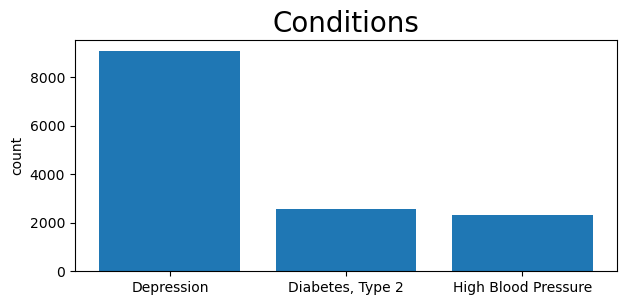

In [24]:
# Plotting a bargraph of 'conditions'
plt.figure(figsize=(7,3))
conditions = df3['condition'].value_counts(ascending = False)
plt.bar(conditions.index,conditions.values)
plt.title('Conditions',fontsize = 20)
plt.ylabel('count')
plt.show()

### ==> From the above plot, we can see 'Depression' has the highest count, from this we can assume most of the drugs that patients have depression condition

In [25]:
# Names of drugs
df3['drugName'].unique()

array(['L-methylfolate', 'Sertraline', 'Venlafaxine', 'Dulaglutide',
       'Effexor XR', 'Wellbutrin', 'Aripiprazole',
       'Amlodipine / olmesartan', 'Desvenlafaxine', 'Fluoxetine',
       'Bupropion', 'Trintellix', 'Liraglutide', 'Lisinopril',
       'Empagliflozin', 'Metoprolol', 'Victoza', 'Trazodone', 'Pristiq',
       'Levomilnacipran', 'Cymbalta', 'Exenatide', 'Bydureon',
       'Escitalopram', 'Nardil', 'Zoloft', 'Prazosin', 'Methylphenidate',
       'Wellbutrin XL', 'Lexapro', 'Viibryd', 'Effexor', 'Zyprexa',
       'Trulicity', 'Sitagliptin', 'Duloxetine', 'Rexulti', 'Quetiapine',
       'Toprol-XL', 'Losartan', 'Hydrochlorothiazide', 'Citalopram',
       'Azor', "St. john's wort", 'Vilazodone', 'Emsam', 'Diovan',
       'Toujeo', 'Empagliflozin / linagliptin', 'Jardiance', 'Celexa',
       'Vortioxetine', 'Ramipril', 'Paxil', 'Valsartan', 'Prozac',
       'Diltiazem', 'Propranolol', 'Lamotrigine', 'Isocarboxazid',
       'Dapagliflozin', 'Tresiba', 'Limbitrol', 'Paroxetin

In [26]:
# No of unique values in drug
df3['drugName'].nunique()

334

In [27]:
df3['rating'].unique()

array([10,  8,  4,  9,  1,  5,  2,  7,  6,  3])

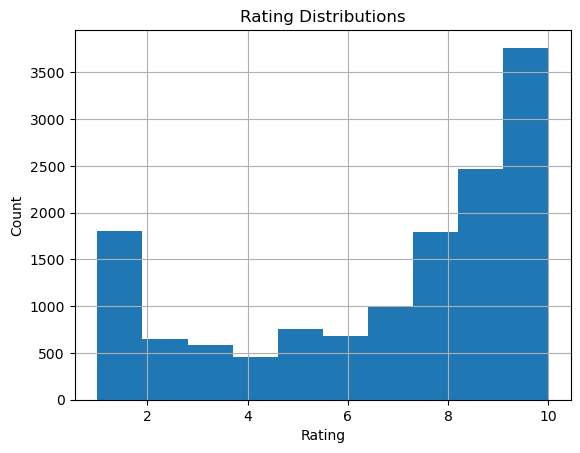

In [28]:
# Plotting 'rating' distribution
df3['rating'].hist()
plt.title("Rating Distributions")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### ==> From the above plot, we can see highest 10/10 rating is (3500>), lowest 1/10 rating is (2000<) & 4/10 rating has lowest count among all. Ratings 10,9,8,1 have the highest count ! furtherly, we should find the side effects caused by drugs & no effects caused by drugs through 'positive/' reviews from the patients

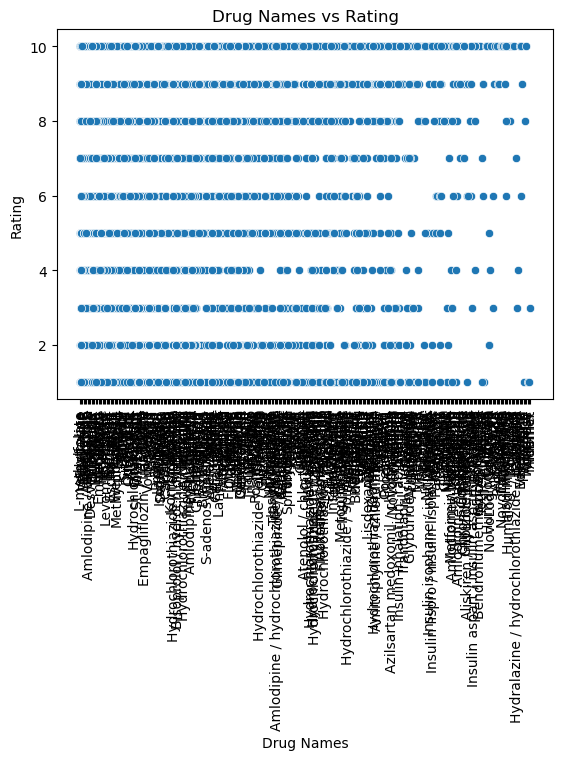

In [29]:
# Plotting 'drugname' distribution
sb.scatterplot(data=df3,x='drugName',y='rating')
plt.title("Drug Names vs Rating")
plt.xlabel('Drug Names')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

### ==> From the above plot, we can't confirm which drugnames have the Highest/Lowest count

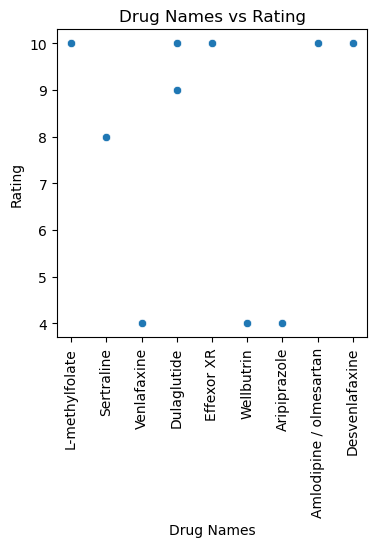

In [30]:
# Scatterplot of 'drugname' distribution
plt.figure(figsize=(4,4))
sb.scatterplot(data=df3.head(10),x='drugName',y='rating')
plt.title("Drug Names vs Rating")
plt.xlabel('Drug Names')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

In [31]:
# Highest rating of 10/10 drugnames 
rate10_dn = df3.loc[df3.rating == 10, 'drugName']
rate10_dn.value_counts()

Bupropion                  158
Sertraline                 126
Escitalopram               118
Desvenlafaxine             115
Citalopram                 112
                          ... 
Benazepril                   1
Budeprion XL                 1
Metformin / sitagliptin      1
Limbitrol                    1
Marplan                      1
Name: drugName, Length: 276, dtype: int64

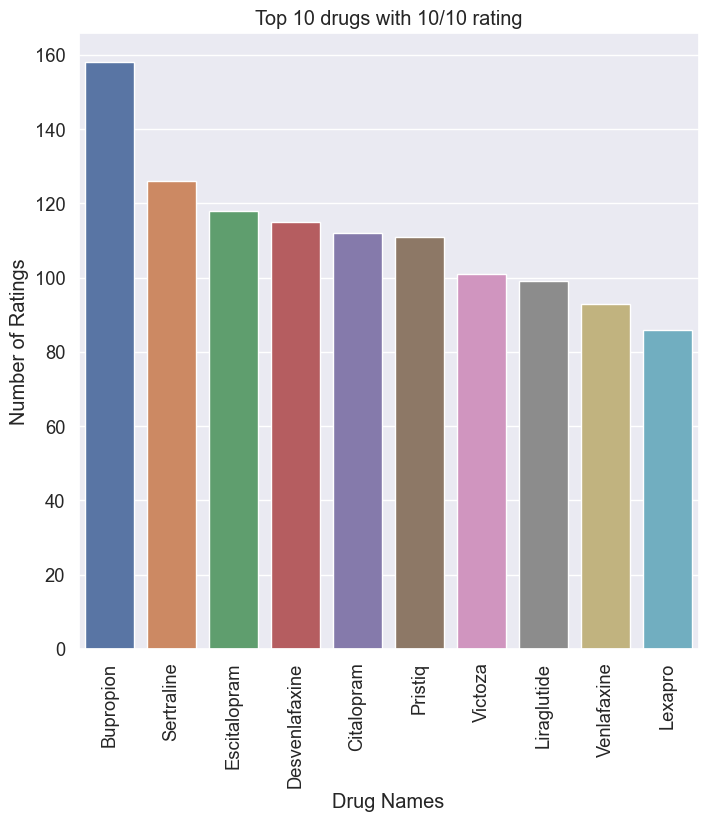

In [32]:
# Plotting barplot which shows the top 10 drugs with 10/10 rating

# Setting the Parameter
sb.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [8, 8]

rating = dict(df3.loc[df3.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sb_rating = sb.barplot(x = drugname[0:10], y = drug_rating[0:10])
sb_rating.set_title('Top 10 drugs with 10/10 rating')
sb_rating.set_ylabel("Number of Ratings")
sb_rating.set_xlabel("Drug Names")
plt.setp(sb_rating.get_xticklabels(), rotation=90);

### ==> From the above plot, 'Bupropion' drug name has the highest count of 10/10 rating

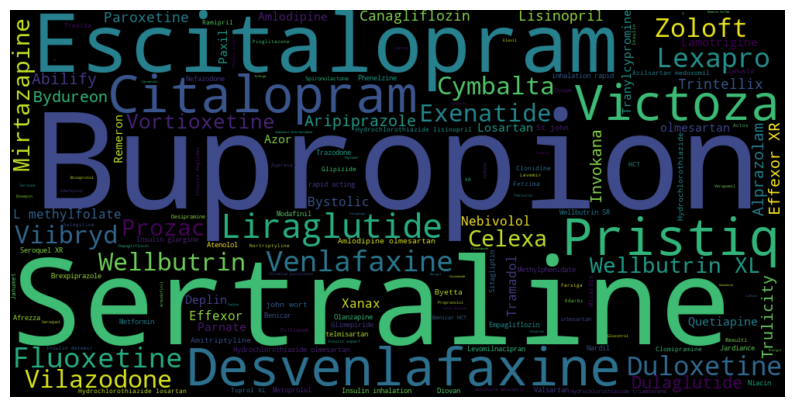

In [33]:
# WordCloud of drugnames which got rating 10/10
from wordcloud import WordCloud
text = (' '.join(rate10_dn)) # Stopwords
wordcloud = WordCloud(width = 1000, height = 500, background_color = 'black').generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

In [34]:
# Lowest rating of 1/10 drugnames
rate1_dn=df3.loc[df3['rating'] == 1, :]['drugName']
rate1_dn.value_counts()

Lisinopril                     74
Venlafaxine                    73
Vortioxetine                   62
Cymbalta                       53
Bupropion                      51
                               ..
Tribenzor                       1
Empagliflozin / linagliptin     1
Zestril                         1
Micardis                        1
Midamor                         1
Name: drugName, Length: 193, dtype: int64

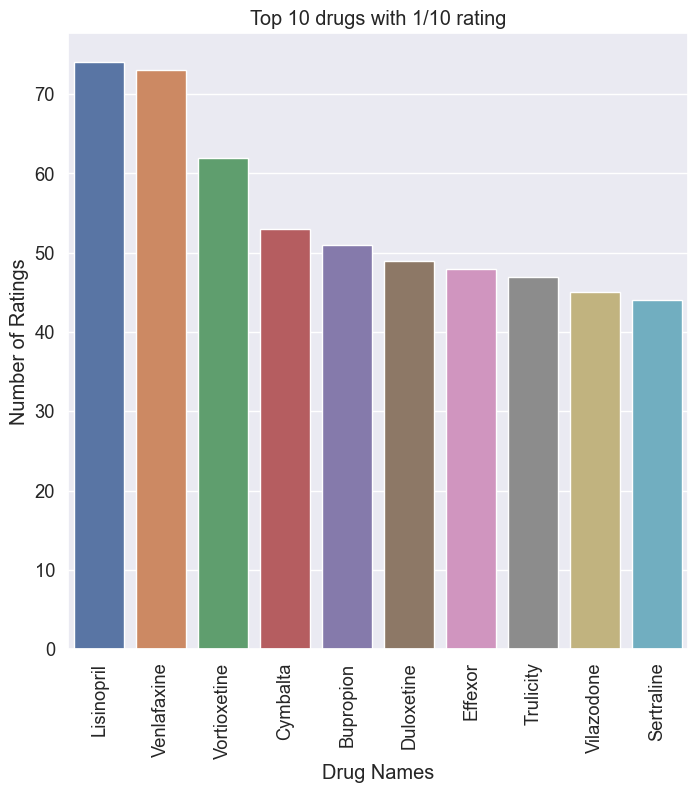

In [35]:
# Plotting barplot which shows the top 10 drugs with 1/10 rating

# Setting the Parameter
sb.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [8, 8]

rating = dict(rate1_dn.value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sb_rating = sb.barplot(x = drugname[0:10], y = drug_rating[0:10])
sb_rating.set_title('Top 10 drugs with 1/10 rating')
sb_rating.set_ylabel("Number of Ratings")
sb_rating.set_xlabel("Drug Names")
plt.setp(sb_rating.get_xticklabels(), rotation=90);

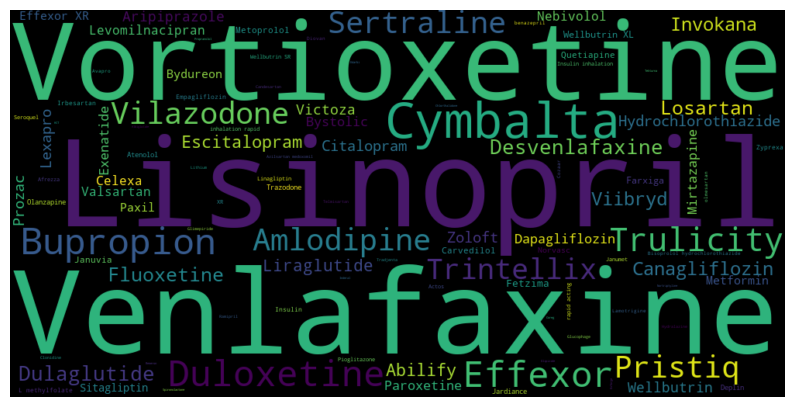

In [36]:
# WordCloud of drugnames which got rating 1/10
from wordcloud import WordCloud
text = (' '.join(rate1_dn)) # Stopwords
wordcloud = WordCloud(width = 1000, height = 500, background_color = 'black').generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

In [37]:
# Unique value of 'usefulcount'
df3['usefulCount'].nunique()

300

In [38]:
# Unique numbers of 'usefulcount'
df3['usefulCount'].unique()

array([  54,    3,   24,  166,   15,   33,   10,  101,   12,   19,    0,
         28,   18,   14,   55,   47,    5,    6,   99,   13,   41,   93,
         74,   34,   68,  376,   88,   63,    2,   81,   46,   42,  179,
         25,   29,    1,   38,   22,   83,   17,   43,   39,    8,   27,
         26,   32,   45,  102,   61,    7,   85,   11,   60,  129,  124,
         35,   36,   20,   66,   97,  122,   57,   79,   52,   51,   92,
        137,   40,   50,   94,  126,    9,  127,   44,   77,  160,   73,
        172,    4,   21,   30,   23,  105,   48,  276,   37,  121,   62,
         76,  771,  110,   16,  113,   98,  123,  152,   64,   31,   59,
        117,  118,   87,   86,  167,  205,   75,  106,  143,  237,  254,
        157,  100,   90,  116,  141,  174,   69,   78,   67,   80,  355,
         84,  140,   58,   82,   70,  111,  161,  186,  176,   72,  138,
        132,  104,  190,  693,  203,  108,   56,  198,   65,   49,  128,
        446, 1291,  185,  175,  364,   53,  134,  2

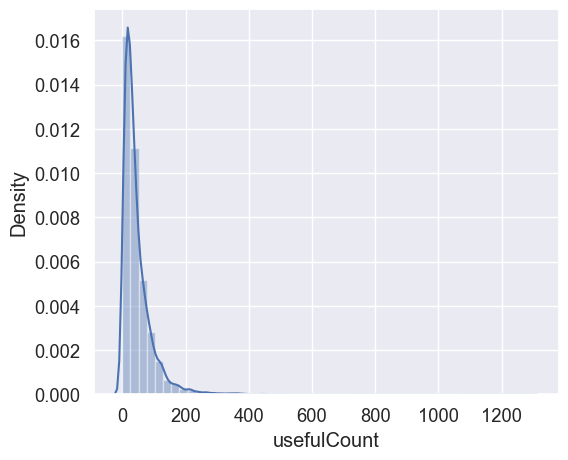

In [39]:
# Distplot of useful count
plt.figure(figsize=(6,5))
sb.distplot(df3['usefulCount'])
plt.show()

### ==> From the above plot, we can see the measure of peakedness of the distribution is 1-Skewed. Most of the 'usefulCounts' are distributed between (0-200).

In [40]:
df3['condition'].value_counts()

Depression             9069
Diabetes, Type 2       2554
High Blood Pressure    2321
Name: condition, dtype: int64

In [41]:
Dep=df3[(df3['condition']=="Depression")]
Hbp=df3[(df3['condition']=="High Blood Pressure")]
Dia=df3[(df3['condition']=="Diabetes, Type 2")]

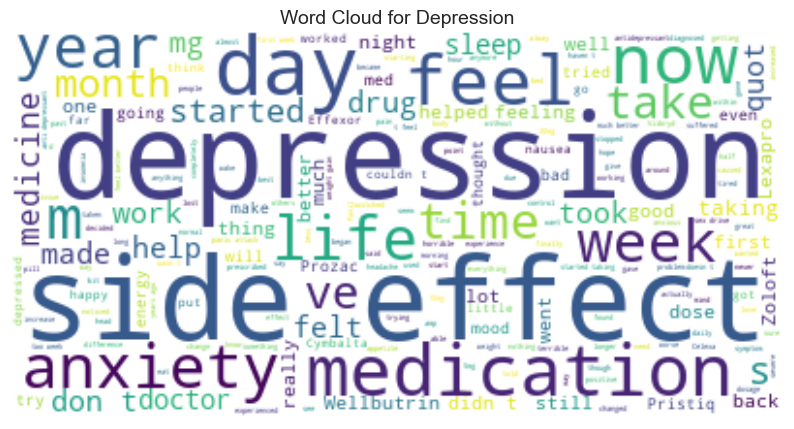

In [42]:
# WordCloud of 'reviews' under 'depression' condition
from wordcloud import WordCloud
plt.figure(figsize = (10,10))
wordcloud_stw = WordCloud(background_color= 'white',
                          width = 400,
                          height = 200).generate( " ".join(Dep.review))

plt.imshow(wordcloud_stw,interpolation="bilinear")
plt.title("Word Cloud for Depression",fontsize=14)
plt.axis('off');

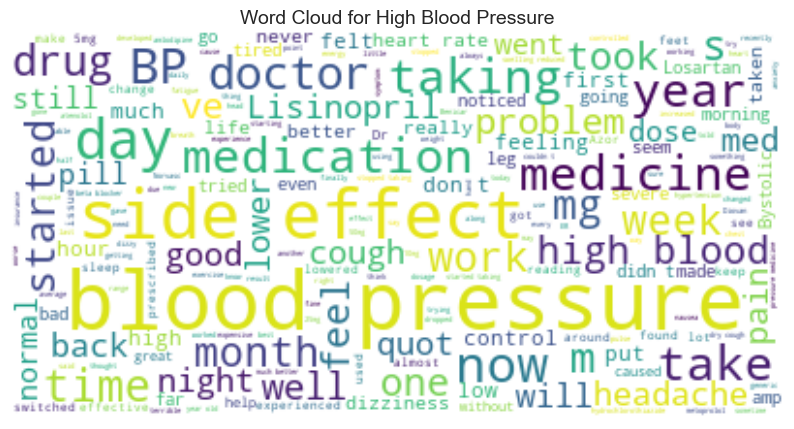

In [43]:
# WordCloud of 'reviews' under 'High blood pressure' condition
from wordcloud import WordCloud
plt.figure(figsize = (10,10))
wordcloud_stw = WordCloud(background_color= 'white',
                          width = 400,
                          height = 200).generate( " ".join(Hbp.review))

plt.imshow(wordcloud_stw,interpolation="bilinear")
plt.title("Word Cloud for High Blood Pressure",fontsize=14)
plt.axis('off');

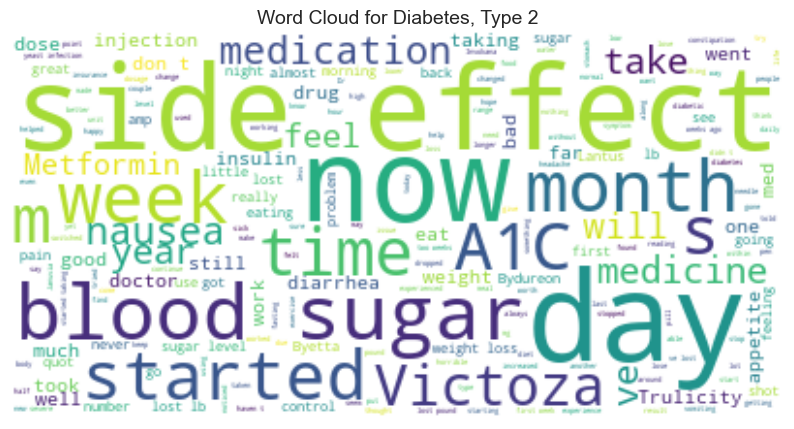

In [44]:
# WordCloud of 'reviews' under 'diabetes, type2' condition
from wordcloud import WordCloud
plt.figure(figsize = (10,10))
wordcloud_stw = WordCloud(background_color= 'white',
                          width = 400,
                          height = 200).generate( " ".join(Dia.review))

plt.imshow(wordcloud_stw,interpolation="bilinear")
plt.title("Word Cloud for Diabetes, Type 2",fontsize=14)
plt.axis('off');

# NLP (Natural Language Processing)

In [45]:
!python -m spacy download en_core_web_sm
!pip install WordCloud
!pip install spacy
!pip install nltk

     ---------------------------------------- 12.8/12.8 MB 2.0 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [46]:
# Checking the first 8 'reviews'
for i in df3['review'][0:8]:
    print(i,'\n')

"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.

I only take Cymbalta now mostly for pain.

When I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects." 

"1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one  but that subsided as the week went on.  I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed." 

"my gp started me on Venlafaxine yesterday to help with depression and the change,a hour after taking them i was feeling very sick couldn,t stomach food or fluids, thought keep it up as she told me they did come with some side effects which would get better,took anot

### ==> From the above reviews we can see that, the text is in unstructured format! so, we have to clean(pre-processing) the 'review' column

### Steps for 'review' Pre-processing

In [47]:
## Remove HTML tags ##
# (Using BeautifulSoup from bs4 module to remove the html tags. We have already removed the html tags with pattern "64</span>...", we will use get_text() to remove the html tags if there are any)
## Remove Stop Words ##
# (Remove the stopwords like "a", "the", "I" etc)
## Remove symbols and special characters ##
# (We will remove the special characters from our reviews like '#' ,'&' ,'@' etc)
## Tokenize ##
# (We will tokenize the words. We will split the sentences with spaces e.g "I might come" --> "I", "might", "come")
## Stemming ##
# (Remove the suffixes from the words to get the root form of the word e.g 'Wording' --> "Word")

In [48]:
# Import the libraries for pre-processing
from bs4 import BeautifulSoup
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

stops = set(stopwords.words('english')) #English stopwords

stemmer = SnowballStemmer('english') #SnowballStemmer

def review_clean(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. Space join words
    return( ' '.join(stemming_words))

In [49]:
# Apply the above function on reviews
df3['review']=df3['review'].apply(review_clean)
df3

drugName            condition  \
11      L-methylfolate           Depression   
31          Sertraline           Depression   
44         Venlafaxine           Depression   
50         Dulaglutide     Diabetes, Type 2   
67          Effexor XR           Depression   
...                ...                  ...   
161251      Metoprolol  High Blood Pressure   
161258        Bystolic  High Blood Pressure   
161278        Invokana     Diabetes, Type 2   
161286    Vortioxetine           Depression   
161290        Tekturna  High Blood Pressure   

                                                   review  rating  usefulCount  
11      taken anti depress year improv most moder seve...      10           54  
31      week zoloft anxieti mood swing take mg morn br...       8            3  
44      gp start venlafaxin yesterday help depress cha...       4            3  
50      hey guy month sinc last post want give month s...      10           24  
67      medicin save life wit end anti depress readi g...      10          166  
...                                                   ...     ...          ...  
161251  fourth blood pressur pill feel like part work ...       4           39  
161258  bystol feet arm numb blood sugar becam sever e...       1           25  
161278  got diagnos type doctor prescrib invokana metf...       9           47  
161286  third med tri anxieti mild depress week hate m...       2           33  
161290  tekturna day effect immedi also calcium channe...       7           18  

[13944 rows x 5 columns]

# Sentiment Analysis

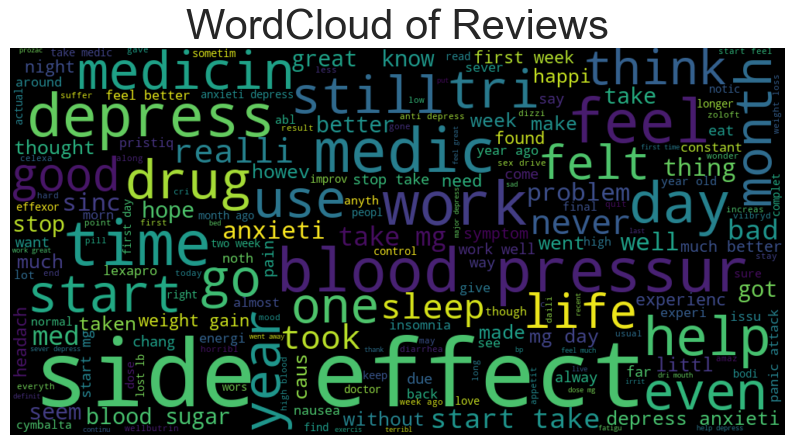

In [50]:
# WordCloud of 'review'
from wordcloud import WordCloud
text = (' '.join(df3['review'])) # Stopwords
wordcloud = WordCloud(width = 1000, height = 500, background_color = 'black').generate(text)
plt.figure(figsize=(10, 10))
plt.title('WordCloud of Reviews', fontsize = 30)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

In [51]:
# let's make a new column of review sentiment 
df3.loc[(df3['rating'] > 5), 'Review_Sentiment'] = 'Positive'
df3.loc[(df3['rating'] == 5), 'Review_Sentiment'] = 'Neutral'
df3.loc[(df3['rating'] < 5), 'Review_Sentiment'] = 'Negative'
df3

drugName            condition  \
11      L-methylfolate           Depression   
31          Sertraline           Depression   
44         Venlafaxine           Depression   
50         Dulaglutide     Diabetes, Type 2   
67          Effexor XR           Depression   
...                ...                  ...   
161251      Metoprolol  High Blood Pressure   
161258        Bystolic  High Blood Pressure   
161278        Invokana     Diabetes, Type 2   
161286    Vortioxetine           Depression   
161290        Tekturna  High Blood Pressure   

                                                   review  rating  \
11      taken anti depress year improv most moder seve...      10   
31      week zoloft anxieti mood swing take mg morn br...       8   
44      gp start venlafaxin yesterday help depress cha...       4   
50      hey guy month sinc last post want give month s...      10   
67      medicin save life wit end anti depress readi g...      10   
...                                                   ...     ...   
161251  fourth blood pressur pill feel like part work ...       4   
161258  bystol feet arm numb blood sugar becam sever e...       1   
161278  got diagnos type doctor prescrib invokana metf...       9   
161286  third med tri anxieti mild depress week hate m...       2   
161290  tekturna day effect immedi also calcium channe...       7   

        usefulCount Review_Sentiment  
11               54         Positive  
31                3         Positive  
44                3         Negative  
50               24         Positive  
67              166         Positive  
...             ...              ...  
161251           39         Negative  
161258           25         Negative  
161278           47         Positive  
161286           33         Negative  
161290           18         Positive  

[13944 rows x 6 columns]

In [52]:
df3['Review_Sentiment'].value_counts()

Positive    9701
Negative    3487
Neutral      756
Name: Review_Sentiment, dtype: int64

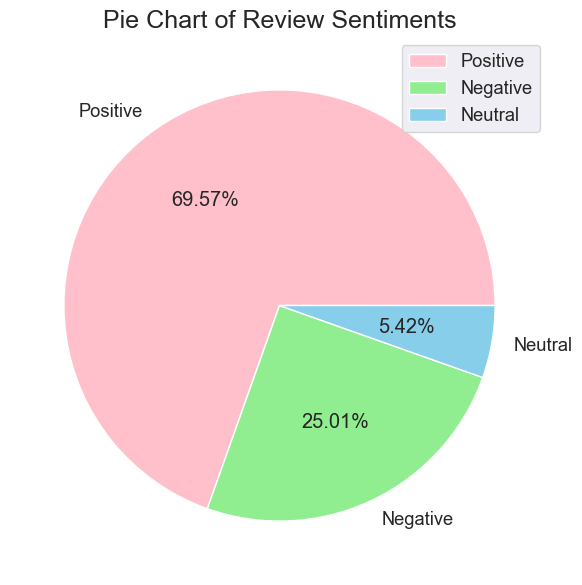

In [53]:
# A pie chart to represent the sentiments of the patients
size = [9701, 3487, 756]
colors = ['pink', 'lightgreen', 'skyblue']
labels = "Positive", "Negative", "Neutral"

plt.rcParams['figure.figsize'] = (7,7)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart of Review Sentiments', fontsize = 18)
plt.legend()
plt.show()

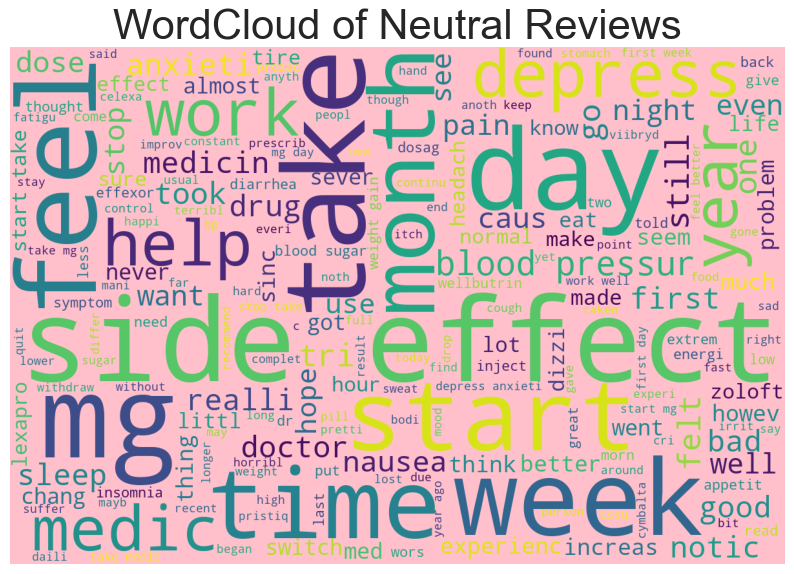

In [54]:
# WordCloud of 'Neutral sentiment'
positive_sentiment = " ".join([text for text in df3['review'][df3['Review_Sentiment'] == 'Neutral']])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'pink', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiment)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('WordCloud of Neutral Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

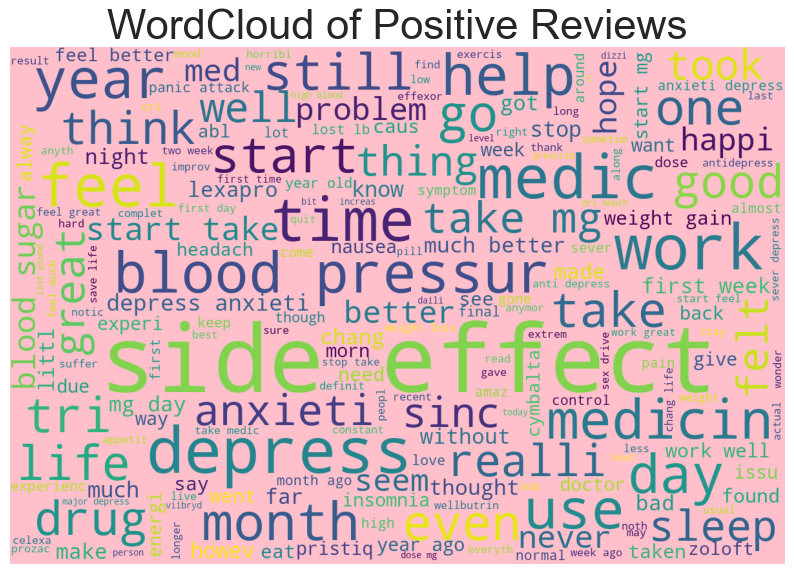

In [55]:
# WordCloud of 'Positive sentiment'
_sentiment = " ".join([text for text in df3['review'][df3['Review_Sentiment'] == 'Positive']])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'pink', stopwords = stopwords, width = 1200, height = 800).generate(_sentiment)

plt.rcParams['figure.figsize'] = (10, 10)

plt.title('WordCloud of Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

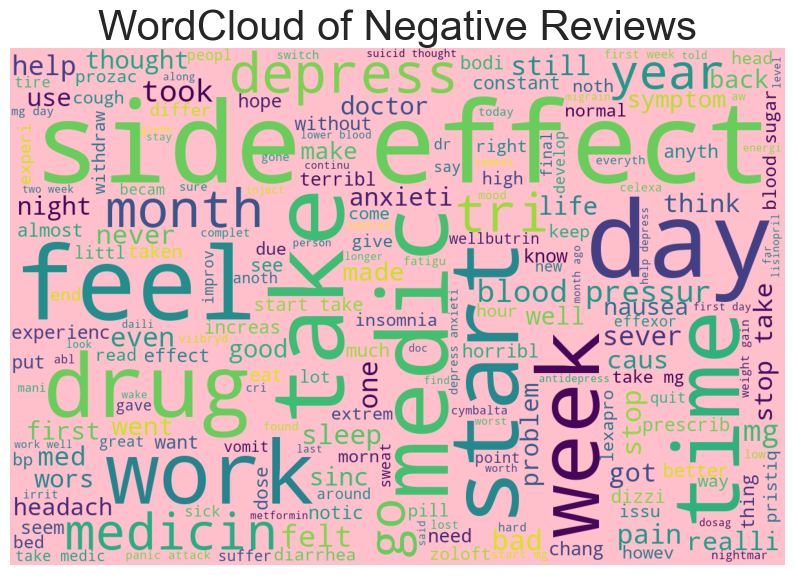

In [56]:
# WordCloud of 'Negative sentiment'
neutral_sentiment = " ".join([text for text in df3['review'][df3['Review_Sentiment'] == 'Negative']])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'pink', stopwords = stopwords, width = 1200, height = 800).generate(neutral_sentiment)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('WordCloud of Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# Emotional Mining

In [57]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape 

(2477, 2)

In [58]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [59]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence.
import spacy
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [60]:
# Test it to see if it works
calculate_sentiment(text='super') # 1

3

In [61]:
calculate_sentiment(text='burden') # 

-2

In [62]:
# Applying function to 'review'
df3['Sentiment_value']=df3['review'].apply(calculate_sentiment) 

In [63]:
df3

drugName            condition  \
11      L-methylfolate           Depression   
31          Sertraline           Depression   
44         Venlafaxine           Depression   
50         Dulaglutide     Diabetes, Type 2   
67          Effexor XR           Depression   
...                ...                  ...   
161251      Metoprolol  High Blood Pressure   
161258        Bystolic  High Blood Pressure   
161278        Invokana     Diabetes, Type 2   
161286    Vortioxetine           Depression   
161290        Tekturna  High Blood Pressure   

                                                   review  rating  \
11      taken anti depress year improv most moder seve...      10   
31      week zoloft anxieti mood swing take mg morn br...       8   
44      gp start venlafaxin yesterday help depress cha...       4   
50      hey guy month sinc last post want give month s...      10   
67      medicin save life wit end anti depress readi g...      10   
...                                                   ...     ...   
161251  fourth blood pressur pill feel like part work ...       4   
161258  bystol feet arm numb blood sugar becam sever e...       1   
161278  got diagnos type doctor prescrib invokana metf...       9   
161286  third med tri anxieti mild depress week hate m...       2   
161290  tekturna day effect immedi also calcium channe...       7   

        usefulCount Review_Sentiment  Sentiment_value  
11               54         Positive                2  
31                3         Positive                0  
44                3         Negative               -2  
50               24         Positive                5  
67              166         Positive                7  
...             ...              ...              ...  
161251           39         Negative               -1  
161258           25         Negative               -3  
161278           47         Positive                0  
161286           33         Negative               -3  
161290           18         Positive               -3  

[13944 rows x 7 columns]

In [64]:
# Sentiment score of the whole review
df3['Sentiment_value'].describe()

count    13944.000000
mean         0.903973
std          4.867140
min        -25.000000
25%         -2.000000
50%          1.000000
75%          4.000000
max         25.000000
Name: Sentiment_value, dtype: float64

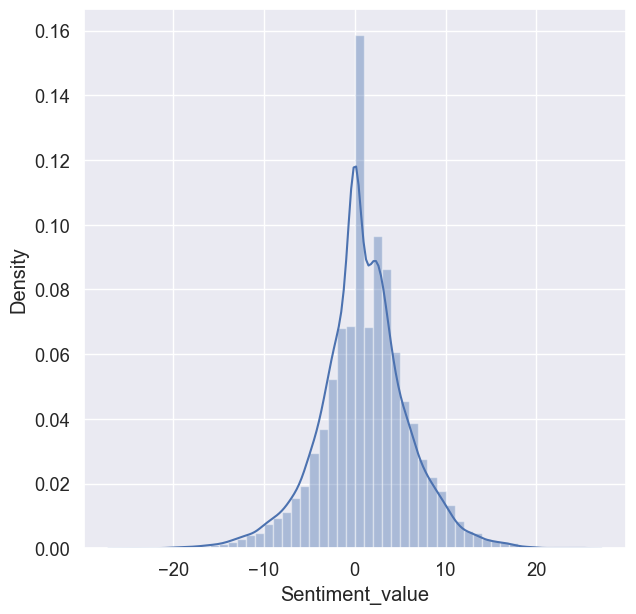

In [65]:
# Distplot of 'sentiment value'
plt.figure(figsize=(7,7))
sb.distplot(df3['Sentiment_value'])
plt.show()

### 5) Label Encoding

In [66]:
# Label Encoding 'Drugname' and 'Conditions'
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugName', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    df3[feature] = label_encoder_feat[feature].fit_transform(df3[feature])

In [67]:
df3

drugName  condition  \
11           173          0   
31           275          0   
44           313          0   
50            89          1   
67            95          0   
...          ...        ...   
161251       202          2   
161258        55          2   
161278       164          1   
161286       320          0   
161290       287          2   

                                                   review  rating  \
11      taken anti depress year improv most moder seve...      10   
31      week zoloft anxieti mood swing take mg morn br...       8   
44      gp start venlafaxin yesterday help depress cha...       4   
50      hey guy month sinc last post want give month s...      10   
67      medicin save life wit end anti depress readi g...      10   
...                                                   ...     ...   
161251  fourth blood pressur pill feel like part work ...       4   
161258  bystol feet arm numb blood sugar becam sever e...       1   
161278  got diagnos type doctor prescrib invokana metf...       9   
161286  third med tri anxieti mild depress week hate m...       2   
161290  tekturna day effect immedi also calcium channe...       7   

        usefulCount Review_Sentiment  Sentiment_value  
11               54         Positive                2  
31                3         Positive                0  
44                3         Negative               -2  
50               24         Positive                5  
67              166         Positive                7  
...             ...              ...              ...  
161251           39         Negative               -1  
161258           25         Negative               -3  
161278           47         Positive                0  
161286           33         Negative               -3  
161290           18         Positive               -3  

[13944 rows x 7 columns]

# Model building

In [68]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split

fea_v = df3[['drugName','condition','usefulCount','Sentiment_value']]

tar_v = df3['Review_Sentiment']

x_train, x_test, y_train, y_test = train_test_split(fea_v, tar_v, test_size = 0.3, random_state = 42)

### 1) Passive Agressive Classifier

In [77]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score   

passive = PassiveAggressiveClassifier()
passive.fit(x_train, y_train)
pred = passive.predict(x_test)
score_pac_c = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score_pac_c)

accuracy:   0.684


### 2) Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred = rfc.predict(x_test)
score_rfc_c = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score_rfc_c)

accuracy:   0.680


### 3) Logistic Regression

In [79]:
from sklearn import datasets, linear_model
lr = linear_model.LogisticRegression()

lr = linear_model.LogisticRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
score_lr_c = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score_lr_c)

accuracy:   0.696


### 4) Support Vector Machine

In [88]:
from sklearn import svm
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(x_train,y_train)

# predict the labels on validation dataset
pred_SVM = SVM.predict(x_test)
# Use accuracy_score function to get the accuracy
score_svm = metrics.accuracy_score(y_test, pred_SVM)
print("accuracy:   %0.3f" % score_svm)

accuracy:   0.684


### Accuracy among all

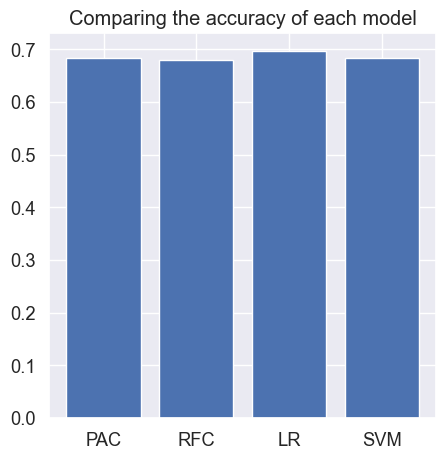

In [85]:
Accuracy = [score_pac_c, score_rfc_c, score_lr_c, score_svm]
Methods = ['PAC', 'RFC', 'LR', 'SVM']
Accuracy_pos = np.arange(len(Methods))
plt.figure(figsize=(5,5))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing the accuracy of each model')
plt.show()

### ==> From the above visualization, we can see that 'LR' model has the high accuracy among all